# Chapter 4

Selected exercises from ISLR - Chapter 4. Solutions are written in python.

First, let's import all the packages required to run the exercises below.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import copy
import statsmodels.api as sm

Links to the exercises in this notebook: <br>
[Exercise 10](#exercise-10) <br>

<a id='exercise-10'></a>
## Exercise 10

This question involves the `Weekly` dataset: 

In [51]:
data = pd.read_csv('data/Weekly.csv')
data['Direction'] = data['Direction'].apply(lambda x: 1 if x=='Up' else 0)   # Transform Up=1, Down=0 

### 10.a 
Numerical and graphical summaries of the Weekly data

In [6]:
data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [10]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


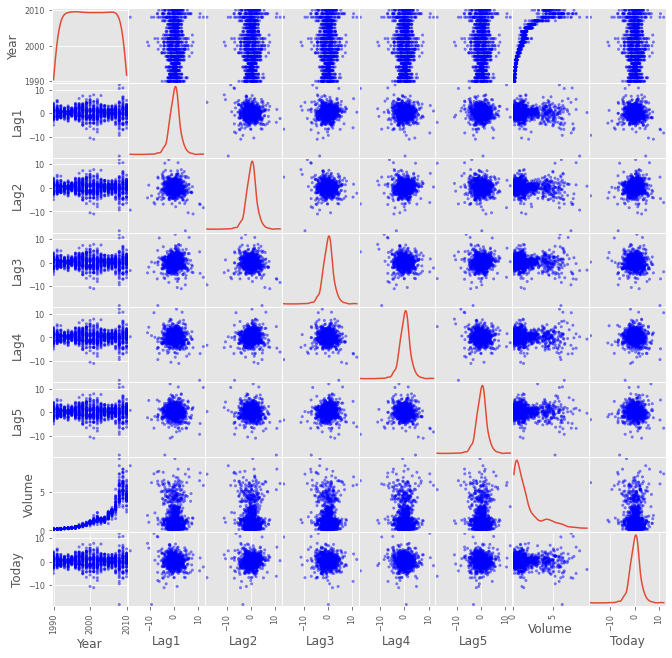

In [16]:
scatterplot = pd.plotting.scatter_matrix(data, figsize = (11, 11), diagonal = 'kde', color='blue')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


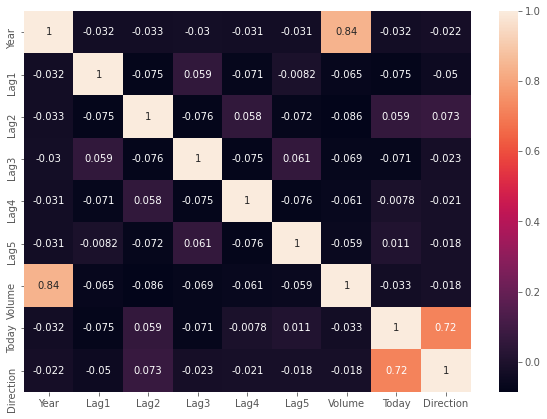

In [52]:
corr_matrix = data.corr()    # Compute Pearson's correlation
display(corr_matrix)
plt.subplots(figsize=(10,7)) 
sns.heatmap(corr_matrix, annot = True)
plt.show()

- It seems like there is a non-linear relationship between `Year` and `Volume`.
- There is a relationship between `Today` and `Direction (UP)` (expected, since `Today` represents the percentage return of the week)

### 10.b
Perform a logistic regression with `Direction` as the response and five lag variables plus `Volume` as predictors. Comment on the results.

In [69]:
response = 'Direction'
predictors = np.array(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'])
X = sm.add_constant(data[predictors])
log_reg = sm.Logit(data[response], X).fit()
display(log_reg.summary())
print(f'The significant predictors are: {predictors[log_reg.pvalues.values[1:] < 0.05]}')
print(f'The non-significant predictors are: {predictors[log_reg.pvalues.values[1:] >= 0.05]}')

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                0.006580
Time:                        18:13:22   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

The significant predictors are: ['Lag2']
The non-significant predictors are: ['Lag1' 'Lag3' 'Lag4' 'Lag5' 'Volume']


### 10.c

Instead of relying on llibraries, I create my own confusion matrix:

In [71]:
predictions = log_reg.predict(X)

In [165]:
def confusion_matrix(predictions, ground_truth, threshold, positive_class):
    negative_class = np.delete(np.unique(data[response]), 1)[0]
    discrete_predictions = np.array([1 if i > threshold else 0 for i in predictions])
    true_positives = np.sum(discrete_predictions[ground_truth[ground_truth == positive_class].index] == positive_class)
    true_negatives = np.sum(discrete_predictions[ground_truth[ground_truth == negative_class].index] == negative_class)
    false_positives = np.sum(discrete_predictions[ground_truth[ground_truth == negative_class].index] == positive_class)
    false_negatives = np.sum(discrete_predictions[ground_truth[ground_truth == positive_class].index] == negative_class)
    
    actual_positives = true_positives + false_negatives
    actual_negatives = true_negatives + false_positives
    predicted_positives = true_positives + false_positives
    predicted_negatives = true_negatives + false_negatives 
    recall = true_positives / actual_positives
    precision = true_positives / predicted_positives    
    
    df = pd.DataFrame({'' : ['Positive (Actual)', 'Negative (Actual)', 'Total (Predicted)'],
                       'Positive (Predicted)': [true_positives, false_positives, predicted_positives],
                       'Negative (Predicted)': [false_negatives, true_negatives, predicted_negatives],
                       'Total (Actual)': [actual_positives, actual_negatives, actual_positives + actual_negatives]
                      }).set_index([''])
    display(df)

    print(f'Correctly predicted positives: {round(recall * 100,2)}%')
    print(f'Correctly predicted negatives: {round(true_negatives / actual_negatives * 100, 2)}%')
    print(f'Total correct predictions: {round((true_positives + true_negatives) * 100 / (actual_negatives + actual_positives), 2)}%')

    print(f'Precision: {round(precision, 2)}')
    print(f'Recall: {round(recall, 2)}')

In [139]:
confusion_matrix(predictions, data[response], threshold=0.5, positive_class=1)

,Positive (Predicted),Negative (Predicted),Total (Actual)
,,,
Positive (Actual),557,48,605
Negative (Actual),430,54,484
Total (Predicted),987,102,1089


Correctly predicted positives: 92.07%
Correctly predicted negatives: 11.16%
Total correct predictions: 56.11%
Precision: 0.56
Recall: 0.92


### 10.d

Fit the **logistic regression** using as training data the instances from 1990 to 2008 and as test data those from 2009-2010. Only use `Lag2` as predictor.
Instead of using a library, I'll code my simple logistic regression from scratch.

#### Logistic regression and MLE <span style="background-color: #FFC300">[Theory]</span>

Formally, the logistic regression model is:

$$  \log{\dfrac{p(x)}{1 - p(x)}} = \mathsf{\beta_0} + \beta_1 x  $$ 

and solving for $p(x)$:

$$  p(x) = \dfrac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}} = \sigma(\beta_0, \beta_1) $$ 

To choose values for the parameters, we use maximum likelihood estimation (MLE). So, we first need to express the log-likelihood. The probability of one datapoint is:

$$   p(Y = y | X = x) = \text{Ber}(y | x) = p(x)^y \ [1 - p(x)]^{1 - y}  $$ 

The likelihood of all *N* data can be written as:

$$  L(\beta_0, \beta_1) = \prod_i^N {p(x_i)^{y_i} \ [1 - p(x_i)]^{1 - y_i}} = \prod_i^N  \Bigl(\dfrac{e^{\beta_0 + \beta_1 x_i}}{1 + e^{\beta_0 + \beta_1 x_i}}\Bigr)^{y_i} \Bigl(1 - \dfrac{e^{\beta_0 + \beta_1 x_i}}{1 + e^{\beta_0 + \beta_1 x_i}}\Bigr)^{1 - y_i}  $$  

So, the log-likelihood $LL(\beta_0, \beta_1)$ is: 

$$  LL(\beta_0, \beta_1) = \sum_i^N y_i \log p(x_i) + (1 - y_i) \log(1 - p(x_i)) = $$
$$ = \sum_i^N y_i \log p(x_i) - y_i \log(1 - p(x_i)) + \log(1 - p(x_i)) =  $$
$$ = \sum_i^N y_i \bigl(\log p(x_i) - \log( 1 - p(x_i)) \bigr) + \log(1 - p(x_i)) = $$
$$ = \sum_i^N y_i \log \Bigl( \dfrac{p(x_i)}{1 - p(x_i)} \Bigr) + \log( 1 - p(x_i))  $$

MLE consists in finding the parameters $\beta_0$ and $\beta_1$ that maximize the log-likelihood (or alternatively, that minimize the negative log-likelihood). <br>The derivative $\dfrac{\delta LL(\beta_0, \beta_1)}{\delta \beta_i} = 0$ cannot be solved in closed form. Then, we need to use an optimization algorithm. <br>

First, let's find the derivative using the **Chain rule**. Other methods can be used, but the chain rule is the easiest and it is scalable. Scalability is a nice feature since logistic regression is one of the main building blocks of neural networks.

In [175]:
class Logistic_Regression():
    def __init__(self):
        self.intercept  = None
        self.beta_1 = None
    
    def fit(self, Y, x):
        """
        params:
            Y: horizontal array
            x: horizontal array
        """
        X = np.zeros((x.shape[0], 2))
        X[:, 0] = 1
        X[:, 1] = x
        
    
    def predict(self):
        pass
        

In [176]:
logistic_reg = Logistic_Regression()
logistic_reg.fit(data[response], data['Lag2'])

[[ 1.     1.572]
 [ 1.     0.816]
 [ 1.    -0.27 ]
 ...
 [ 1.     2.969]
 [ 1.     1.281]
 [ 1.     0.283]]


In [162]:
predictors = np.array(['Lag2'])
response = 'Direction'
train_X = sm.add_constant(data[predictors][(data['Year'] >= 1990) & (data['Year'] <= 2008)].reset_index(drop=True))
train_Y = data[response][(data['Year'] >= 1990) & (data['Year'] <= 2008)].reset_index(drop=True)
test_X = sm.add_constant(data[predictors][(data['Year'] >= 2009) & (data['Year'] <= 2010)].reset_index(drop=True))
test_Y = data[response][(data['Year'] >= 2009) & (data['Year'] <= 2010)].reset_index(drop=True)

log_reg = sm.Logit(train_Y, train_X).fit()
display(log_reg.summary())
print(f'The significant predictors are: {predictors[log_reg.pvalues.values[1:] < 0.05]}')
print(f'The non-significant predictors are: {predictors[log_reg.pvalues.values[1:] >= 0.05]}')

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:                0.003076
Time:                        20:06:30   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

The significant predictors are: ['Lag2']
The non-significant predictors are: []


In [166]:
predictions = log_reg.predict(test_X)

In [167]:
confusion_matrix(predictions, test_Y, 0.5, 1)

,Positive (Predicted),Negative (Predicted),Total (Actual)
,,,
Positive (Actual),56,5,61
Negative (Actual),34,9,43
Total (Predicted),90,14,104


Correctly predicted positives: 91.8%
Correctly predicted negatives: 20.93%
Total correct predictions: 62.5%
Precision: 0.62
Recall: 0.92


### 10.e
Repeat using LDA.